# **Day 4/5**: Python Training

The objective of this notebook is to cover some important concepts which we came across during our day 4 of the python training session. In this notebook, we will quickly cover few important concepts mostly around the 4 mostly used modules for data science related projects in python namely - pandas, numpy, matplotlib, plotly

Refer to the outline of this notebook below to browse through different sections of this notebook.  

## **Table of Contents**  
* [Pandas](#pandas)  
    * [Pandas Installation](#pandas-installation)  
    * [Pandas Usage](#pandas-usage)  
        * [Pandas Object Creation](#pandas-object-creation)  
        * [Pandas Viewing Data](#pandas-viewing-data)  
        * [Pandas Selection](#pandas-selection)  
        * [Pandas Missing Data](#pandas-missing-data)  
        * [Pandas Operations](#pandas-operations)  
        * [Pandas Merge](#pandas-merge)  
        * [Pandas Grouping](#pandas-grouping)  
        * [Pandas Reshaping](#pandas-reshaping)
        * [Pandas Categoricals](#pandas-categoricals)
        * [Pandas Plotting](#pandas-plotting)
* [Numpy](#numpy)  
    * [Numpy Installation](#numpy-installation)  
    * [Numpy Usage](#numpy-usage)  
        * [Numpy Array Creation](#numpy-array-creation)  
        * [Numpy Printing Array](#numpy-printing-array)  
        * [Numpy Operations](#numpy-operations)
* [Matplotlib](#matplotlib)
    * [Matplotlib Installation](#matplotlib-installation)  
    * [Matplotlib Usage](#matplotlib-usage)
* [Plotly](#plotly)
    * [Plotly Installation](#plotly-installation)  
    * [Plotly Usage](#plotly-usage)

## **Pandas**

[Back to contents](#table-of-contents)

### Pandas Installation

In [1]:
!pip install pandas==1.5.3


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Pandas Usage  

10 minutes to Pandas Official Link - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf)  
Pandas Cookbook - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf#page=1001&zoom=100,96,657)

In [2]:
import pandas as pd
import numpy as np

#### Pandas Object Creation   

[Back to contents](#table-of-contents)

In [3]:
"""
Pandas have 2 data structures - 1. Series, and 2. Dataframes
Series are 1 dimensional datastruture capable of holding any data type (integers, strings, floats, etc)
Dataframes are 2 dimensional datastructure with columns of potentially different data types or dict of Series objects.
"""
 
# Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# Dataframe with same data type
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,1.496479,-0.138991,-0.979951,-0.649820
2013-01-02,-0.292291,1.811233,-0.346342,0.578061
2013-01-03,-0.689280,0.719888,-0.315880,0.377043
2013-01-04,0.933678,0.937747,-0.084456,0.025718
2013-01-05,-0.090654,1.830919,0.748211,0.183872
2013-01-06,-1.468395,-1.198456,0.251351,-1.628612


In [6]:
# Dataframe with different data types
df2 = pd.DataFrame(
    {
    "A": 1.0,
    "B": pd.Timestamp("20130102"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
# Extracting data types for each column of dataframe
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### Pandas Viewing Data

[Back to contents](#table-of-contents)

In [8]:
# Viewing first 5 rows of the dataframe
df.head()

,A,B,C,D
2013-01-01,1.496479,-0.138991,-0.979951,-0.649820
2013-01-02,-0.292291,1.811233,-0.346342,0.578061
2013-01-03,-0.689280,0.719888,-0.315880,0.377043
2013-01-04,0.933678,0.937747,-0.084456,0.025718
2013-01-05,-0.090654,1.830919,0.748211,0.183872


In [9]:
# Viewing last 5 rows of the dataframe
df.tail()

,A,B,C,D
2013-01-02,-0.292291,1.811233,-0.346342,0.578061
2013-01-03,-0.689280,0.719888,-0.315880,0.377043
2013-01-04,0.933678,0.937747,-0.084456,0.025718
2013-01-05,-0.090654,1.830919,0.748211,0.183872
2013-01-06,-1.468395,-1.198456,0.251351,-1.628612


In [10]:
# Viewing indexes for the dataframe
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# Viewing columns of the dataframe
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
# Converting dataframe to numpy array
df.to_numpy()

array([[ 1.49647885, -0.1389913 , -0.97995122, -0.64981984],
       [-0.29229053,  1.81123287, -0.34634206,  0.57806137],
       [-0.6892796 ,  0.71988785, -0.31587968,  0.37704345],
       [ 0.93367769,  0.93774672, -0.08445568,  0.02571776],
       [-0.09065377,  1.83091901,  0.74821063,  0.18387151],
       [-1.46839481, -1.19845577,  0.25135118, -1.62861157]])

In [13]:
# Extracting Statistics for each column of the dataframe
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.018410,0.660390,-0.121178,-0.185623
std,1.080195,1.172123,0.586867,0.822033
min,-1.468395,-1.198456,-0.979951,-1.628612
25%,-0.590032,0.075728,-0.338726,-0.480935
50%,-0.191472,0.828817,-0.200168,0.104795
75%,0.677595,1.592861,0.167399,0.328750
max,1.496479,1.830919,0.748211,0.578061


In [14]:
# Transposing a dataframe
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.496479,-0.292291,-0.689280,0.933678,-0.090654,-1.468395
B,-0.138991,1.811233,0.719888,0.937747,1.830919,-1.198456
C,-0.979951,-0.346342,-0.315880,-0.084456,0.748211,0.251351
D,-0.649820,0.578061,0.377043,0.025718,0.183872,-1.628612


In [15]:
# Sorting a dataframe by index values
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.649820,-0.979951,-0.138991,1.496479
2013-01-02,0.578061,-0.346342,1.811233,-0.292291
2013-01-03,0.377043,-0.315880,0.719888,-0.689280
2013-01-04,0.025718,-0.084456,0.937747,0.933678
2013-01-05,0.183872,0.748211,1.830919,-0.090654
2013-01-06,-1.628612,0.251351,-1.198456,-1.468395


In [16]:
# Sorting a dataframe by column values
df.sort_values(by="B")

,A,B,C,D
2013-01-06,-1.468395,-1.198456,0.251351,-1.628612
2013-01-01,1.496479,-0.138991,-0.979951,-0.649820
2013-01-03,-0.689280,0.719888,-0.315880,0.377043
2013-01-04,0.933678,0.937747,-0.084456,0.025718
2013-01-02,-0.292291,1.811233,-0.346342,0.578061
2013-01-05,-0.090654,1.830919,0.748211,0.183872


#### Pandas Selection

[Back to contents](#table-of-contents)

In [17]:
# Selecting a specific column by label name
df['A']

2013-01-01    1.496479
2013-01-02   -0.292291
2013-01-03   -0.689280
2013-01-04    0.933678
2013-01-05   -0.090654
2013-01-06   -1.468395
Freq: D, Name: A, dtype: float64

In [18]:
# Selecting dataframe rows by indexes
df[3:5]

,A,B,C,D
2013-01-04,0.933678,0.937747,-0.084456,0.025718
2013-01-05,-0.090654,1.830919,0.748211,0.183872


In [19]:
# Selecting dataframe rows by index value
df.loc[dates[0]]

A    1.496479
B   -0.138991
C   -0.979951
D   -0.649820
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
# Selecting dataframe rows by row and column indices
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.933678,0.937747
2013-01-05,-0.090654,1.830919


In [21]:
# Selecting dataframe rows by row and column indices in list format
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.292291,-0.346342
2013-01-03,-0.689280,-0.315880
2013-01-05,-0.090654,0.748211


In [22]:
# Selecting a specific cell value
df.iloc[1, 1]

1.8112328743233692

In [23]:
# Selecting dataframe rows by boolean / conditional indexing
df[df["A"] > 0]

,A,B,C,D
2013-01-01,1.496479,-0.138991,-0.979951,-0.649820
2013-01-04,0.933678,0.937747,-0.084456,0.025718


In [24]:
# Selecting dataframe values which are greater than zero and eliminating others by replacing
# them with NaN values
df[df > 0]

,A,B,C,D
2013-01-01,1.496479,NaN,NaN,NaN
2013-01-02,NaN,1.811233,NaN,0.578061
2013-01-03,NaN,0.719888,NaN,0.377043
2013-01-04,0.933678,0.937747,NaN,0.025718
2013-01-05,NaN,1.830919,0.748211,0.183872
2013-01-06,NaN,NaN,0.251351,NaN


In [25]:
# Selecting specific dataframe rows by specific column values
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.689280,0.719888,-0.315880,0.377043,two
2013-01-05,-0.090654,1.830919,0.748211,0.183872,four


#### Pandas Missing Data

[Back to contents](#table-of-contents)

In [26]:
# Adding one extra column with NaN values
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1

,A,B,C,D,E
2013-01-01,1.496479,-0.138991,-0.979951,-0.649820,NaN
2013-01-02,-0.292291,1.811233,-0.346342,0.578061,NaN
2013-01-03,-0.689280,0.719888,-0.315880,0.377043,NaN
2013-01-04,0.933678,0.937747,-0.084456,0.025718,NaN


In [27]:
# Replacing two row indices for new column with some value
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,1.496479,-0.138991,-0.979951,-0.649820,1.0
2013-01-02,-0.292291,1.811233,-0.346342,0.578061,1.0
2013-01-03,-0.689280,0.719888,-0.315880,0.377043,NaN
2013-01-04,0.933678,0.937747,-0.084456,0.025718,NaN


In [28]:
# Dropping dataframe rows with NaN values in E column
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,1.496479,-0.138991,-0.979951,-0.649820,1.0
2013-01-02,-0.292291,1.811233,-0.346342,0.578061,1.0


In [29]:
# Filling NaN values with 5 value for E column
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,1.496479,-0.138991,-0.979951,-0.649820,1.0
2013-01-02,-0.292291,1.811233,-0.346342,0.578061,1.0
2013-01-03,-0.689280,0.719888,-0.315880,0.377043,5.0
2013-01-04,0.933678,0.937747,-0.084456,0.025718,5.0


In [30]:
# Getting positions in dataframe have values == NaN
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


#### Pandas Operations

[Back to contents](#table-of-contents)

In [31]:
# Extracting mean values for all columns in the dataframe
df.mean()

A   -0.018410
B    0.660390
C   -0.121178
D   -0.185623
dtype: float64

In [32]:
# Squaring one specific column of dataframe using lambda function 
df['C_squared'] = df['C'].apply(lambda x: x*x)
df

,A,B,C,D,C_squared
2013-01-01,1.496479,-0.138991,-0.979951,-0.649820,0.960304
2013-01-02,-0.292291,1.811233,-0.346342,0.578061,0.119953
2013-01-03,-0.689280,0.719888,-0.315880,0.377043,0.099780
2013-01-04,0.933678,0.937747,-0.084456,0.025718,0.007133
2013-01-05,-0.090654,1.830919,0.748211,0.183872,0.559819
2013-01-06,-1.468395,-1.198456,0.251351,-1.628612,0.063177


In [33]:
# Creating pandas series with string data types
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [34]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### Pandas Merge

[Back to contents](#table-of-contents)

In [35]:
# Generating pandas dataframe for breaking down into fragments
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.790359,0.282215,-2.543794,-0.296266
1,-0.361087,1.067886,-1.389102,-0.394756
2,-1.001598,-2.373635,1.954948,-0.358085
3,1.547429,-0.418280,0.635229,1.134020
4,1.391774,1.612479,-0.631870,-1.340230
5,-0.618541,-0.154383,0.185523,-0.179626
6,-1.019263,0.531630,-0.647375,0.769279
7,-0.654262,1.227607,0.803630,-0.420745
8,0.231728,-0.911391,-0.999569,-0.434664
9,0.766562,-0.642329,0.124052,-0.684321


In [36]:
# Breaking down above dataframe into list of dataframes
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.790359  0.282215 -2.543794 -0.296266
 1 -0.361087  1.067886 -1.389102 -0.394756
 2 -1.001598 -2.373635  1.954948 -0.358085,
           0         1         2         3
 3  1.547429 -0.418280  0.635229  1.134020
 4  1.391774  1.612479 -0.631870 -1.340230
 5 -0.618541 -0.154383  0.185523 -0.179626
 6 -1.019263  0.531630 -0.647375  0.769279,
           0         1         2         3
 7 -0.654262  1.227607  0.803630 -0.420745
 8  0.231728 -0.911391 -0.999569 -0.434664
 9  0.766562 -0.642329  0.124052 -0.684321]

In [37]:
# Generating 2 dummy datframes to merge together
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print('\n')
print(right)

   key  lval
0  foo     1
1  foo     2


   key  rval
0  foo     4
1  foo     5


In [38]:
# Performing left join for left dataframe with right dataframe and on column name = 'key'
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### Pandas Grouping

[Back to contents](#table-of-contents)

In [39]:
# Generating a dataframe to perform grouping 
df = pd.DataFrame(
    {
    "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
    "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
    "C": np.random.randn(8),
    "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.041674,0.682914
1,bar,one,-0.153708,-0.550597
2,foo,two,0.075352,-0.996814
3,bar,three,-0.017113,-2.254393
4,foo,two,-0.721308,-0.474935
5,bar,two,1.561717,-0.635372
6,foo,one,-0.162038,-0.392661
7,foo,three,-0.093351,-0.814491


In [40]:
# Grouping a dataframe and performing aggregations
df.groupby(by='A').agg({'C':'sum', 'D':'mean'})

,C,D
A,,
bar,1.390896,-1.146787
foo,-0.859671,-0.399197


#### Pandas Reshaping

[Back to contents](#table-of-contents)

In [41]:
tuples = list(
    zip(
    *[
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
    ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [42]:
# Generating a multindex dataframe
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one     0.467574  0.182971
      two     0.207059  0.257323
baz   one     2.318860 -0.225164
      two     0.790272 -0.550981
foo   one     0.525097 -0.609236
      two    -0.999650 -0.682599
qux   one     0.462989 -0.042137
      two    -2.136758  0.917033

In [43]:
# Stacking a dataframe based on column names
df2 = df[:4]
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.467574
               B    0.182971
       two     A    0.207059
               B    0.257323
baz    one     A    2.318860
               B   -0.225164
       two     A    0.790272
               B   -0.550981
dtype: float64

In [44]:
# Unstacking a stacked dataframe
stacked.unstack()

A         B
first second                    
bar   one     0.467574  0.182971
      two     0.207059  0.257323
baz   one     2.318860 -0.225164
      two     0.790272 -0.550981

In [45]:
# Unstacking a dataframe based on second index
stacked.unstack(1)

second        one       two
first                      
bar   A  0.467574  0.207059
      B  0.182971  0.257323
baz   A  2.318860  0.790272
      B -0.225164 -0.550981

In [46]:
# Unstacking a dataframe based on first index
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.467574  2.318860
       B  0.182971 -0.225164
two    A  0.207059  0.790272
       B  0.257323 -0.550981

In [47]:
# Generating a pandas dataframe for pivotting
df = pd.DataFrame(
    {
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A", "B", "C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.094547,-0.183743
1,one,B,foo,-0.322346,-1.169262
2,two,C,foo,0.764381,-0.464243
3,three,A,bar,0.737645,-0.651297
4,one,B,bar,1.839705,1.461040
5,one,C,bar,-0.355006,-0.850433
6,two,A,foo,0.574794,-0.102556
7,three,B,foo,-0.588306,0.595984
8,one,C,foo,0.349068,-0.193534
9,one,A,bar,0.895620,-0.261331


In [48]:
# Performing pivot on the generated dataframe
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.895620  0.094547
      B  1.839705 -0.322346
      C -0.355006  0.349068
three A  0.737645       NaN
      B       NaN -0.588306
      C -0.098198       NaN
two   A       NaN  0.574794
      B -0.533754       NaN
      C       NaN  0.764381

#### Pandas Categoricals

[Back to contents](#table-of-contents)

In [49]:
# Generating a datframe to convert data tye into categorical type
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [50]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

#### Pandas Plotting

[Back to contents](#table-of-contents)

In [51]:
# Generating a time series dataframe for plotting the cumulative sum
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000",periods=1000))
ts = ts.cumsum()
ts

2000-01-01     1.425742
2000-01-02     0.760632
2000-01-03    -0.451626
2000-01-04    -2.048662
2000-01-05    -1.361685
                ...    
2002-09-22    24.282763
2002-09-23    23.000216
2002-09-24    22.771201
2002-09-25    23.685325
2002-09-26    24.476392
Freq: D, Length: 1000, dtype: float64

<AxesSubplot: >

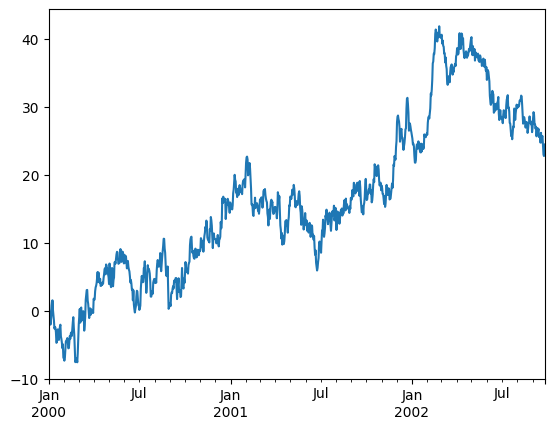

In [52]:
ts.plot()

In [53]:
# Generating a time series dataframe with multiple column labels
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df

,A,B,C,D
2000-01-01,-1.484046,0.641496,-0.473110,0.467417
2000-01-02,0.753233,0.576043,-0.339252,-1.906224
2000-01-03,0.510151,-0.840515,2.184280,1.293415
2000-01-04,0.365249,-0.264914,0.381940,-1.481196
2000-01-05,0.348553,0.344753,0.244929,1.506184
...,...,...,...,...
2002-09-22,-1.790988,-0.291777,2.213859,1.241624
2002-09-23,0.286810,0.330458,0.287380,-0.066602
2002-09-24,-1.287711,0.088339,1.077168,-0.130974
2002-09-25,-1.599828,-0.851643,0.673658,-0.371401


In [54]:
df = df.cumsum()

<AxesSubplot: title={'center': 'sales_data_plot'}, xlabel='date_range', ylabel='sales'>

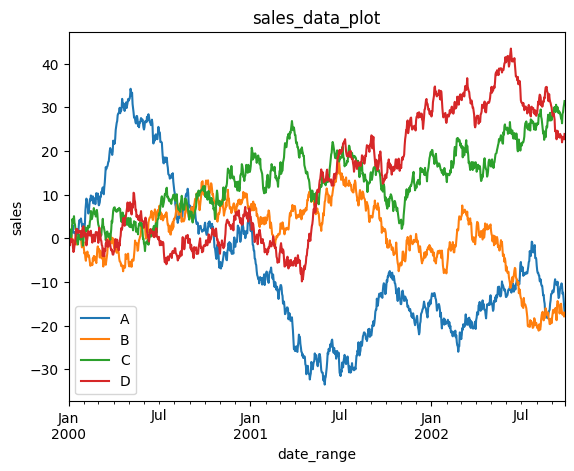

In [55]:
df.plot(xlabel='date_range', ylabel='sales', title='sales_data_plot')

## **Numpy**

[Back to contents](#table-of-contents)

### Numpy Installation

In [56]:
pip install numpy==1.24.1


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Numpy Usage

In [57]:
import numpy as np

#### Numpy Array Creation  

[Back to contents](#table-of-contents)

In [58]:
# Generating a numpy array from list of elements
a = np.array([2,3,4])
a

array([2, 3, 4])

In [59]:
# Checking the data type in the numpy array
a.dtype

dtype('int32')

In [60]:
# Generating a numpy array with floating nos data type
b = np.array([(1.5,2,3), (4,5,6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [61]:
# Generating a numpy array with complex nos data type
c = np.array([[1,2], [3,4]], dtype=complex )
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [62]:
# Generating a 2D - zero filled array of the 3 rows and 4 columns
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [63]:
# Generating a 3D - 1 filled array of the 3 rows and 4 columns
np.ones((2,3,4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [64]:
# Generating numpy array with numbers between 0 and 2 for 9 numbers in total
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

#### Numpy Printing Array

[Back to contents](#table-of-contents)

In [65]:
# Generating a 1D array
a = np.arange(6) 
print(a)

print('\n')

# Generating a 2D array
b = np.arange(12).reshape(4,3)
print(b)

print('\n')

# Generating a 3D array
c = np.arange(24).reshape(2,3,4) 
print(c)

[0 1 2 3 4 5]


[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


#### Numpy Operations

[Back to contents](#table-of-contents)

In [66]:
# All arithmetic operations occur in numpy arrays at element level
a = np.array([20,30,40,50])
b = np.arange(4)

c = a-b
print(c)
print(b**2)
print(10*np.sin(a))
print(a<30)

[20 29 38 47]
[0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[ True False False False]


## **Matplotlib**

[Back to contents](#table-of-contents)

### Matplotlib Installation

### Matplotlib Usage

## **Plotly**

[Back to contents](#table-of-contents)

### Plotly Installation

### Plotly Usage